### Example Notebook of all SSA / ODE methods with N colors

Lets load in an H2B construct with two different probe locations


In [1]:
#setup, lets load a large gene (HUMINSR) ~1700bp
import numpy as np
import os

os.chdir('..')

from rss import rSNAPsim
from rss import ProbeVectorFactory as pvf
from rss import PropensityFactory as pff
from rss import TranslationSolvers as tss
import matplotlib.pyplot as plt
import time
os.chdir('./interactive_notebooks')

rsim = rSNAPsim()
rsim.open_seq_file('../gene_files/H2B_2tags.txt')

poi = rsim.proteins['1'][0]  #protein object

solver = tss()  #solver class
solver.protein=poi

t = np.linspace(0,500,501)


.\generalized_cpp
importing models


C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:4754: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


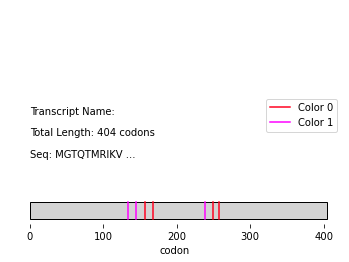

In [2]:
poi.visualize_probe()

(2, 501, 100)
Low memory, no recording: solved in 0.169606 seconds


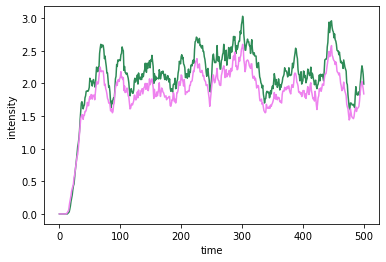

In [3]:

#with recording and low memory
sttime = time.time()
solver.colors=2

ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=100)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)



In [7]:
np.mean(np.mean(ssa_soln.intensity_vec[:,100:,:],axis=2),axis=1)

array([2.22997506, 1.95795511])

### this is sort of boring, lets change up the probes a bit

{'T_Flag': [157, 167, 249, 258], 'T_Hemagglutinin': [133, 144, 239]}
{'T_Flag': [10, 20, 30, 40, 50, 60, 70], 'T_Hemagglutinin': [300, 330, 340, 350]}


C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:3410: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


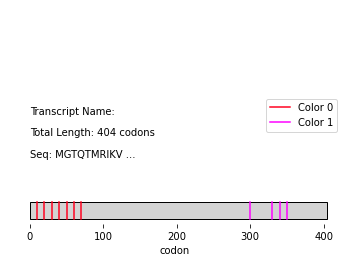

In [4]:
print(poi.tag_epitopes)

poi.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
poi.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]
print(poi.tag_epitopes)

solver.protein=poi

poi.visualize_probe()


2
(2, 501, 100)
Low memory, no recording: solved in 0.180040 seconds


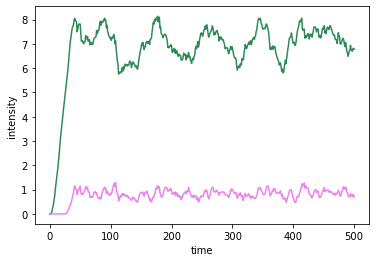

In [5]:

#with recording and low memory
sttime = time.time()
solver.colors=2

ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=100)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)


{'T_Flag': [10, 20, 30, 40, 50, 60, 70], 'T_Hemagglutinin': [300, 330, 340, 350]}
{'T_Flag': [10, 20, 30, 40, 50, 60, 70], 'T_Hemagglutinin': [300, 330, 340, 350], 'T_1': [200, 210, 220, 230], 'T_2': [100, 110, 120, 130], 'T_3': [3, 67, 88]}


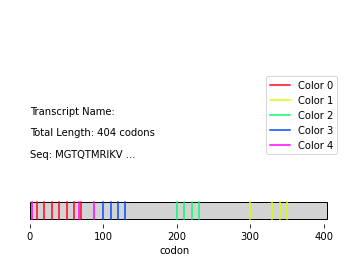

In [7]:
print(poi.tag_epitopes)

poi.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
poi.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]

poi.tag_epitopes['T_1'] = [200,210,220,230]
poi.tag_epitopes['T_2'] = [100,110,120,130]
poi.tag_epitopes['T_3'] = [3,67,88]

print(poi.tag_epitopes)

solver.protein=poi

poi.visualize_probe()



5
(5, 501, 400)
Low memory, no recording: solved in 0.827698 seconds


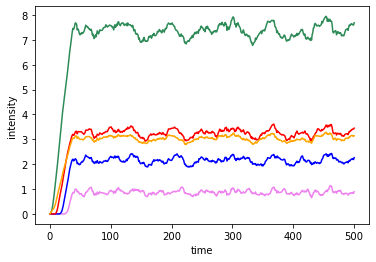

In [8]:
#with recording and low memory
sttime = time.time()
solver.colors=5

ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=400)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[2],axis=1),color='blue',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[3],axis=1),color='red',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[4],axis=1),color='orange',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)

[[0. 0. 0. ... 7. 7. 7.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 3. 3. 3.]]
(404, 404)
(405, 501)
Full ODE solution: solved in 0.845192 seconds


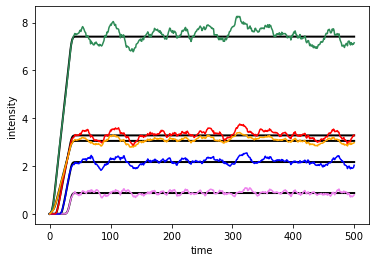

In [8]:
sttime = time.time()
x0 = np.zeros((len(poi.kelong),1))
ode_soln = tss().solve_ode(poi.kelong,   t, x0, .033,poi.probe_loc,corr=False)
solvetime = time.time()-sttime


plt.plot(ode_soln.mu_It.T,'k',lw=2)
plt.xlabel('time')
plt.ylabel('intensity')
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[2],axis=1),color='blue',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[3],axis=1),color='red',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[4],axis=1),color='orange',alpha=1)
print("Full ODE solution: solved in %f seconds" % solvetime)


### Leaky Probes set to have similar values

(5, 501, 400)
Low memory, no recording: solved in 2.760472 seconds


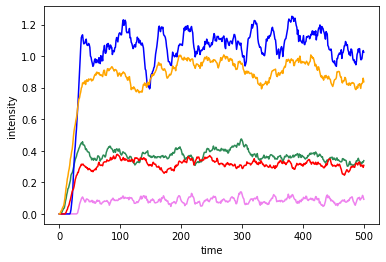

In [12]:
#with recording and low memory
sttime = time.time()
solver.colors=5

ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=400, leaky_probes = True, k_probe=[.05,.1,.5,.1,.3],record_stats=True)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[2],axis=1),color='blue',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[3],axis=1),color='red',alpha=1)
plt.plot(np.mean(ssa_soln.intensity_vec[4],axis=1),color='orange',alpha=1)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)